# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

20:20:38 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=71799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=82568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=666524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=518310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

20:20:39 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=277802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=232613;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

20:20:41 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=153662;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=140254;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

20:20:42 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=20858;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=429212;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

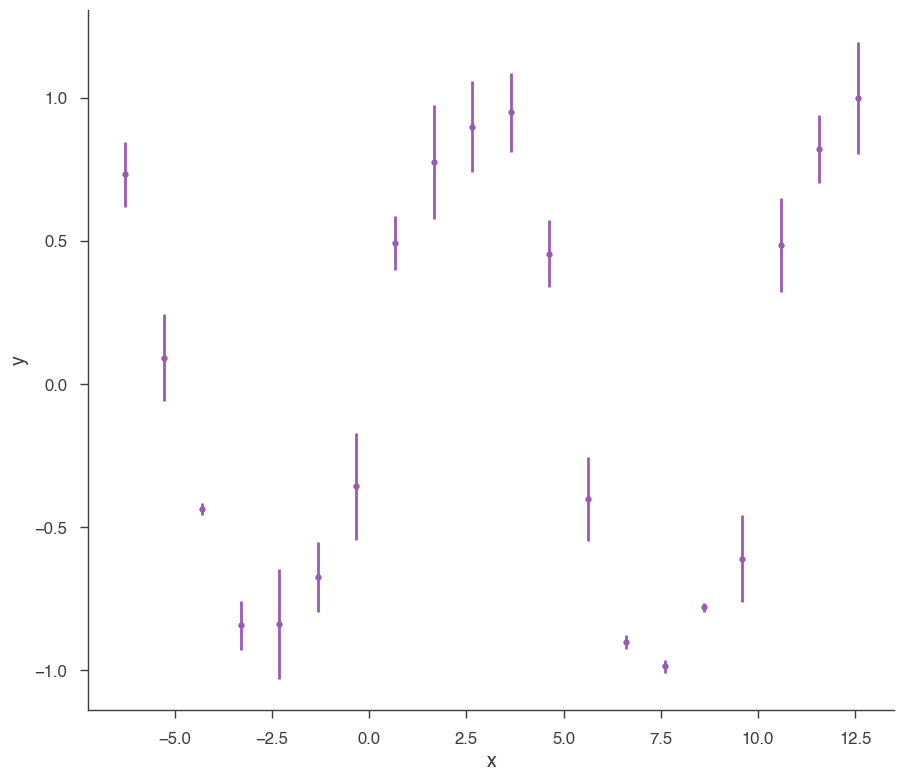

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=289639;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=957572;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

20:20:47 INFO      Mean acceptance fraction: 0.7053                                            ]8;id=866473;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=177959;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

20:20:48 INFO      fit restored to maximum of posterior                                         ]8;id=943281;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=74163;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=116978;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=59478;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.014 -0.015 +0.014,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.000 +/- 0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.468786
total,-9.468786


Values of statistical measures:

,statistical measures
AIC,23.643454
BIC,24.929036
DIC,23.028562
PDIC,2.045353


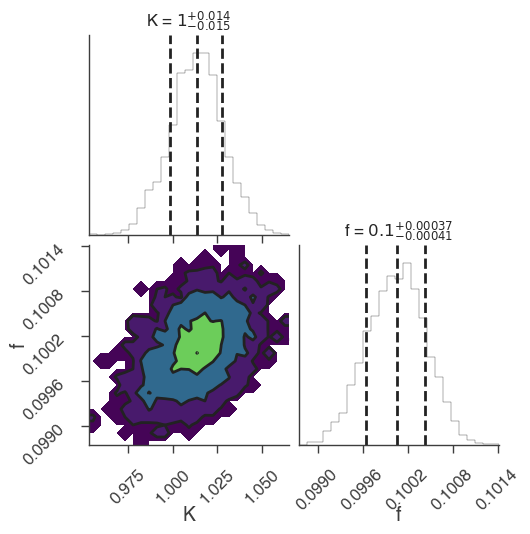

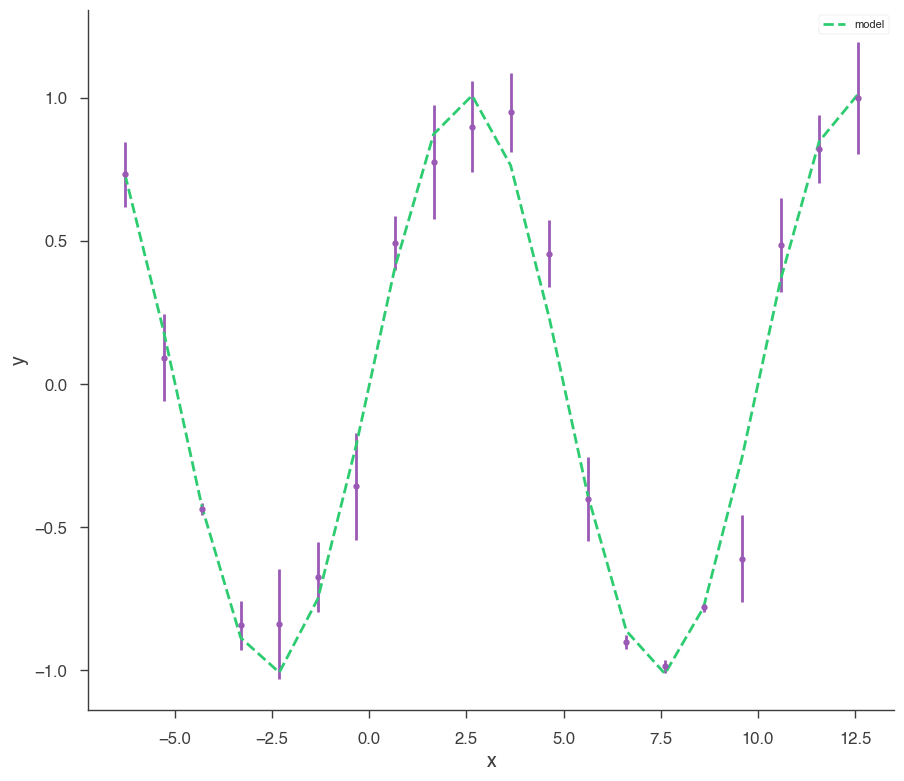

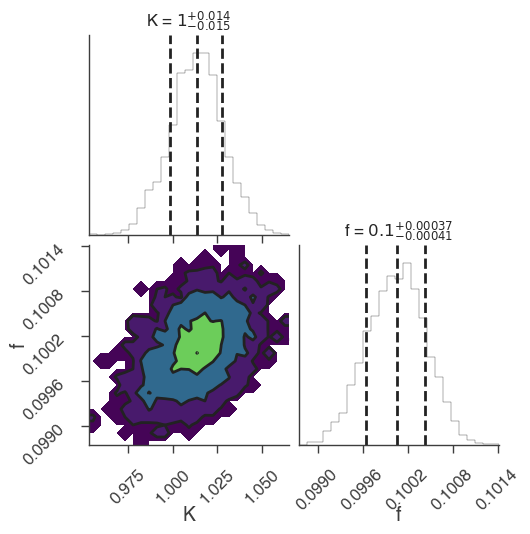

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

20:20:49 INFO      sampler set to multinest                                                ]8;id=752131;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=765910;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -19.330645372072052      +/-  0.14956971567997687     
 Total Likelihood Evaluations:         5471
 Sampling finished. Exiting MultiNest



20:20:51 INFO      fit restored to maximum of posterior                                         ]8;id=194754;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=777514;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=977179;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=844613;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.014 -0.013 +0.014,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.000 +/- 0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.468803
total,-9.468803


Values of statistical measures:

,statistical measures
AIC,23.643488
BIC,24.929070
DIC,22.796295
PDIC,1.927577
log(Z),-8.395193


         INFO      deleting the chain directory chains                                     ]8;id=93484;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=7686;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

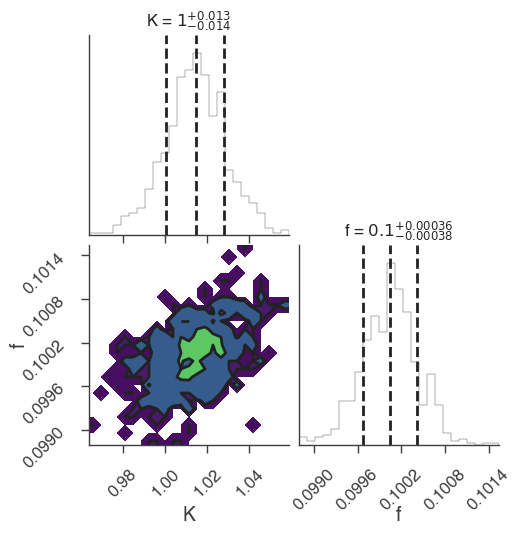

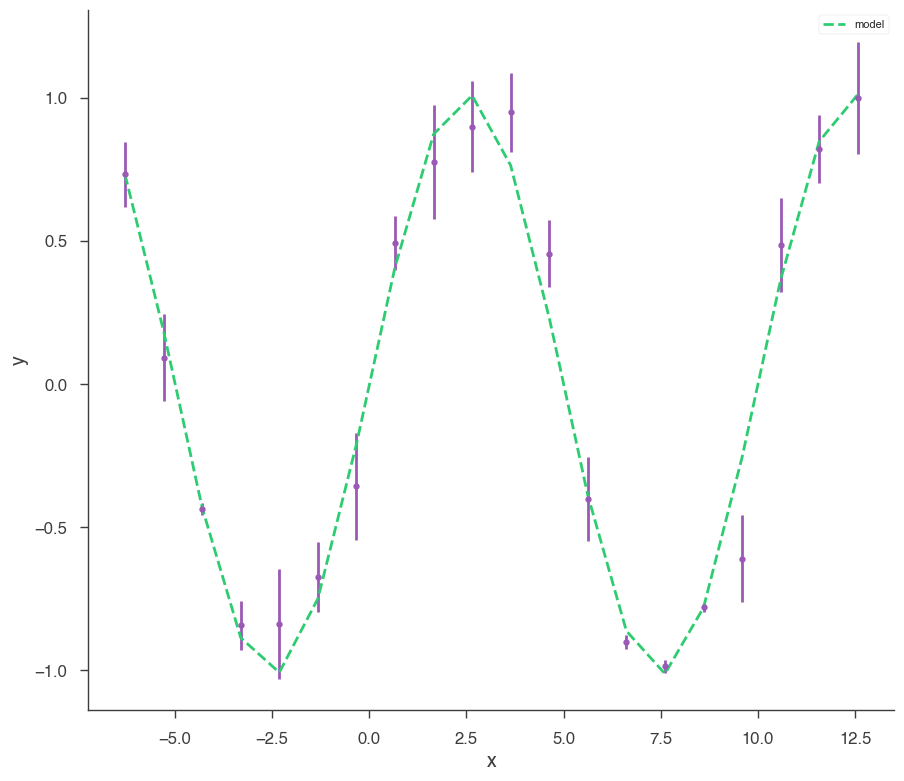

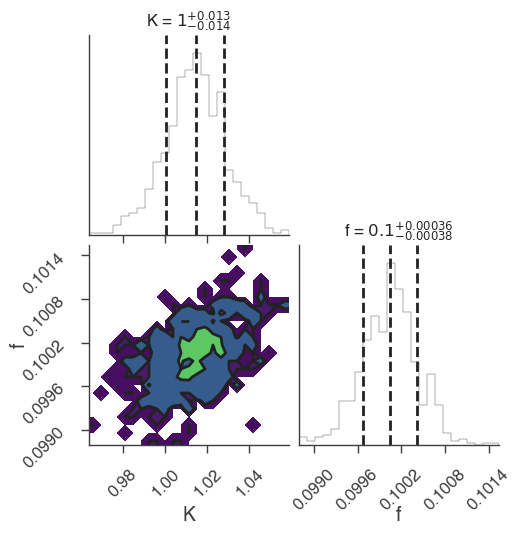

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

20:20:52 INFO      sampler set to dynesty_nested                                           ]8;id=85907;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=785154;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

170it [00:00, 1692.77it/s, bound: 0 | nc: 4 | ncall: 619 | eff(%): 27.464 | loglstar:   -inf < -6181.619 <    inf | logz: -6188.728 +/-  0.133 | dlogz: 6192.124 >  0.409]

340it [00:00, 1425.63it/s, bound: 0 | nc: 2 | ncall: 943 | eff(%): 36.055 | loglstar:   -inf < -4638.730 <    inf | logz: -4646.263 +/-  0.137 | dlogz: 4635.408 >  0.409]

486it [00:00, 1344.71it/s, bound: 0 | nc: 2 | ncall: 1322 | eff(%): 36.762 | loglstar:   -inf < -3672.898 <    inf | logz: -3680.790 +/-  0.140 | dlogz: 3668.210 >  0.409]

622it [00:00, 1160.63it/s, bound: 0 | nc: 2 | ncall: 1879 | eff(%): 33.103 | loglstar:   -inf < -3165.578 <    inf | logz: -3173.809 +/-  0.143 | dlogz: 3160.527 >  0.409]

742it [00:00, 963.48it/s, bound: 0 | nc: 19 | ncall: 2554 | eff(%): 29.052 | loglstar:   -inf < -2841.456 <    inf | logz: -2849.978 +/-  0.145 | dlogz: 2840.789 >  0.409]

844it [00:00, 819.66it/s, bound: 0 | nc: 9 | ncall: 3286 | eff(%): 25.685 | loglstar:   -inf < -2408.601 <    inf | logz: -2417.388 +/-  0.148 | dlogz: 2409.079 >  0.409] 

931it [00:01, 698.39it/s, bound: 0 | nc: 58 | ncall: 4021 | eff(%): 23.153 | loglstar:   -inf < -2195.707 <    inf | logz: -2203.956 +/-  0.137 | dlogz: 2190.702 >  0.409]

1006it [00:01, 570.38it/s, bound: 0 | nc: 19 | ncall: 4976 | eff(%): 20.217 | loglstar:   -inf < -1608.556 <    inf | logz: -1617.752 +/-  0.152 | dlogz: 1617.261 >  0.409]

1069it [00:01, 509.84it/s, bound: 0 | nc: 9 | ncall: 5767 | eff(%): 18.537 | loglstar:   -inf < -1327.394 <    inf | logz: -1335.699 +/-  0.142 | dlogz: 1322.305 >  0.409] 

1124it [00:01, 448.91it/s, bound: 0 | nc: 58 | ncall: 6589 | eff(%): 17.059 | loglstar:   -inf < -1066.908 <    inf | logz: -1076.366 +/-  0.152 | dlogz: 1065.575 >  0.409]

1172it [00:01, 382.30it/s, bound: 0 | nc: 57 | ncall: 7527 | eff(%): 15.571 | loglstar:   -inf < -902.680 <    inf | logz: -910.805 +/-  0.139 | dlogz: 896.604 >  0.409]   

1213it [00:01, 323.27it/s, bound: 0 | nc: 29 | ncall: 8505 | eff(%): 14.262 | loglstar:   -inf < -802.333 <    inf | logz: -812.034 +/-  0.155 | dlogz: 802.212 >  0.409]

1248it [00:02, 296.83it/s, bound: 0 | nc: 55 | ncall: 9267 | eff(%): 13.467 | loglstar:   -inf < -725.664 <    inf | logz: -734.662 +/-  0.143 | dlogz: 721.753 >  0.409]

1279it [00:02, 282.80it/s, bound: 0 | nc: 10 | ncall: 9829 | eff(%): 13.013 | loglstar:   -inf < -666.262 <    inf | logz: -676.051 +/-  0.154 | dlogz: 665.274 >  0.409]

1308it [00:02, 258.48it/s, bound: 0 | nc: 3 | ncall: 10486 | eff(%): 12.474 | loglstar:   -inf < -619.241 <    inf | logz: -628.770 +/-  0.149 | dlogz: 616.430 >  0.409]

1334it [00:02, 225.88it/s, bound: 0 | nc: 1 | ncall: 11276 | eff(%): 11.830 | loglstar:   -inf < -585.882 <    inf | logz: -595.432 +/-  0.148 | dlogz: 582.788 >  0.409]

1357it [00:02, 210.00it/s, bound: 0 | nc: 19 | ncall: 11946 | eff(%): 11.359 | loglstar:   -inf < -554.060 <    inf | logz: -562.583 +/-  0.143 | dlogz: 549.069 >  0.409]

1378it [00:02, 203.78it/s, bound: 0 | nc: 25 | ncall: 12487 | eff(%): 11.035 | loglstar:   -inf < -520.319 <    inf | logz: -530.282 +/-  0.154 | dlogz: 518.411 >  0.409]

1400it [00:02, 202.34it/s, bound: 0 | nc: 65 | ncall: 12988 | eff(%): 10.779 | loglstar:   -inf < -492.120 <    inf | logz: -501.824 +/-  0.148 | dlogz: 488.921 >  0.409]

1421it [00:03, 181.95it/s, bound: 0 | nc: 3 | ncall: 13680 | eff(%): 10.387 | loglstar:   -inf < -467.257 <    inf | logz: -477.276 +/-  0.154 | dlogz: 465.049 >  0.409] 

1440it [00:03, 173.72it/s, bound: 0 | nc: 33 | ncall: 14296 | eff(%): 10.073 | loglstar:   -inf < -444.847 <    inf | logz: -453.576 +/-  0.146 | dlogz: 439.850 >  0.409]

1458it [00:03, 126.23it/s, bound: 1 | nc: 1 | ncall: 14466 | eff(%): 10.079 | loglstar:   -inf < -427.570 <    inf | logz: -437.586 +/-  0.152 | dlogz: 424.963 >  0.409] 

1589it [00:03, 362.41it/s, bound: 1 | nc: 2 | ncall: 14663 | eff(%): 10.837 | loglstar:   -inf < -305.001 <    inf | logz: -315.107 +/-  0.151 | dlogz: 302.759 >  0.409]

1707it [00:03, 540.99it/s, bound: 1 | nc: 9 | ncall: 14921 | eff(%): 11.440 | loglstar:   -inf < -228.514 <    inf | logz: -238.122 +/-  0.148 | dlogz: 224.852 >  0.409]

1777it [00:03, 429.52it/s, bound: 2 | nc: 1 | ncall: 15071 | eff(%): 11.791 | loglstar:   -inf < -192.256 <    inf | logz: -202.561 +/-  0.151 | dlogz: 189.377 >  0.409]

1920it [00:04, 632.05it/s, bound: 2 | nc: 4 | ncall: 15276 | eff(%): 12.569 | loglstar:   -inf < -142.208 <    inf | logz: -151.849 +/-  0.147 | dlogz: 137.855 >  0.409]

2065it [00:04, 813.34it/s, bound: 2 | nc: 6 | ncall: 15531 | eff(%): 13.296 | loglstar:   -inf < -104.201 <    inf | logz: -113.956 +/-  0.151 | dlogz: 99.542 >  0.409] 

2166it [00:04, 612.08it/s, bound: 3 | nc: 1 | ncall: 15701 | eff(%): 13.795 | loglstar:   -inf < -84.164 <    inf | logz: -93.836 +/-  0.149 | dlogz: 79.105 >  0.409]  

2301it [00:04, 757.55it/s, bound: 3 | nc: 2 | ncall: 15903 | eff(%): 14.469 | loglstar:   -inf < -64.342 <    inf | logz: -73.662 +/-  0.146 | dlogz: 58.494 >  0.409]

2439it [00:04, 894.26it/s, bound: 3 | nc: 3 | ncall: 16169 | eff(%): 15.084 | loglstar:   -inf < -47.645 <    inf | logz: -57.368 +/-  0.148 | dlogz: 41.863 >  0.409]

2549it [00:04, 654.11it/s, bound: 4 | nc: 1 | ncall: 16354 | eff(%): 15.586 | loglstar:   -inf < -37.905 <    inf | logz: -47.651 +/-  0.148 | dlogz: 31.843 >  0.409]

2690it [00:04, 798.77it/s, bound: 4 | nc: 1 | ncall: 16584 | eff(%): 16.220 | loglstar:   -inf < -30.310 <    inf | logz: -40.081 +/-  0.147 | dlogz: 23.904 >  0.409]

2815it [00:05, 894.43it/s, bound: 4 | nc: 3 | ncall: 16836 | eff(%): 16.720 | loglstar:   -inf < -25.075 <    inf | logz: -34.616 +/-  0.147 | dlogz: 18.104 >  0.409]

2926it [00:05, 700.46it/s, bound: 5 | nc: 1 | ncall: 16989 | eff(%): 17.223 | loglstar:   -inf < -20.988 <    inf | logz: -30.983 +/-  0.149 | dlogz: 14.212 >  0.409]

3068it [00:05, 842.83it/s, bound: 5 | nc: 3 | ncall: 17224 | eff(%): 17.812 | loglstar:   -inf < -17.687 <    inf | logz: -27.435 +/-  0.148 | dlogz: 10.293 >  0.409]

3174it [00:05, 642.90it/s, bound: 6 | nc: 1 | ncall: 17463 | eff(%): 18.176 | loglstar:   -inf < -15.853 <    inf | logz: -25.577 +/-  0.148 | dlogz:  8.164 >  0.409]

3344it [00:05, 838.50it/s, bound: 6 | nc: 1 | ncall: 17676 | eff(%): 18.918 | loglstar:   -inf < -13.662 <    inf | logz: -23.515 +/-  0.148 | dlogz:  5.677 >  0.409]

3471it [00:05, 928.16it/s, bound: 6 | nc: 5 | ncall: 17934 | eff(%): 19.354 | loglstar:   -inf < -12.552 <    inf | logz: -22.292 +/-  0.148 | dlogz:  4.171 >  0.409]

3587it [00:06, 715.71it/s, bound: 7 | nc: 1 | ncall: 18129 | eff(%): 19.786 | loglstar:   -inf < -11.745 <    inf | logz: -21.542 +/-  0.148 | dlogz:  3.180 >  0.409]

3721it [00:06, 836.39it/s, bound: 7 | nc: 1 | ncall: 18354 | eff(%): 20.274 | loglstar:   -inf < -11.121 <    inf | logz: -20.891 +/-  0.148 | dlogz:  2.260 >  0.409]

3847it [00:06, 927.67it/s, bound: 7 | nc: 4 | ncall: 18623 | eff(%): 20.657 | loglstar:   -inf < -10.701 <    inf | logz: -20.460 +/-  0.148 | dlogz:  1.623 >  0.409]

3959it [00:06, 696.21it/s, bound: 8 | nc: 3 | ncall: 18786 | eff(%): 21.074 | loglstar:   -inf < -10.387 <    inf | logz: -20.170 +/-  0.148 | dlogz:  1.194 >  0.409]

4087it [00:06, 808.92it/s, bound: 8 | nc: 1 | ncall: 19010 | eff(%): 21.499 | loglstar:   -inf < -10.097 <    inf | logz: -19.916 +/-  0.148 | dlogz:  0.831 >  0.409]

4189it [00:07, 591.49it/s, bound: 9 | nc: 1 | ncall: 19270 | eff(%): 21.738 | loglstar:   -inf < -9.959 <    inf | logz: -19.765 +/-  0.148 | dlogz:  0.622 >  0.409] 

4336it [00:07, 746.63it/s, bound: 9 | nc: 1 | ncall: 19463 | eff(%): 22.278 | loglstar:   -inf < -9.791 <    inf | logz: -19.603 +/-  0.148 | dlogz:  0.411 >  0.409]

4337it [00:07, 600.40it/s, +400 | bound: 9 | nc: 1 | ncall: 19865 | eff(%): 24.336 | loglstar:   -inf < -9.457 <    inf | logz: -19.245 +/-  0.148 | dlogz:  0.001 >  0.409]

20:20:59 INFO      fit restored to maximum of posterior                                         ]8;id=22597;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=216226;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=823372;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=609734;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.013 -0.013 +0.015,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.001 +/- 0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.470013
total,-9.470013


Values of statistical measures:

,statistical measures
AIC,23.645908
BIC,24.931490
DIC,22.916007
PDIC,1.988775
log(Z),-8.358118


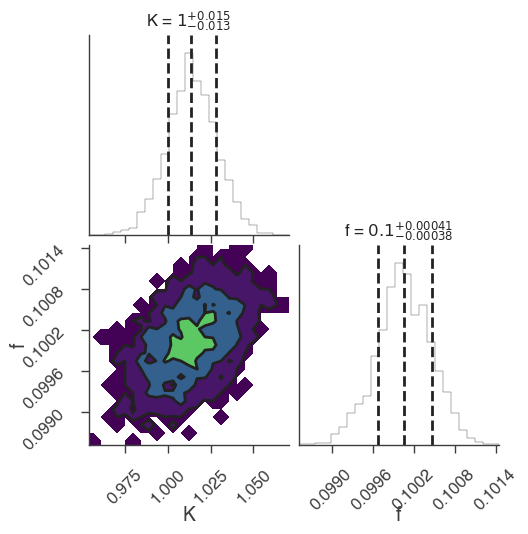

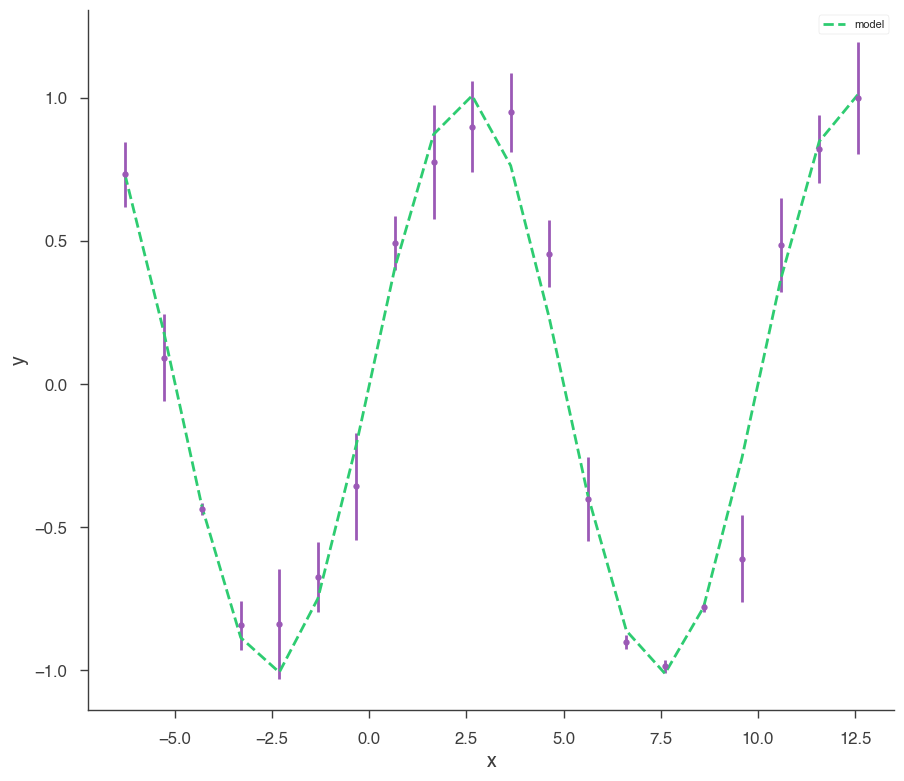

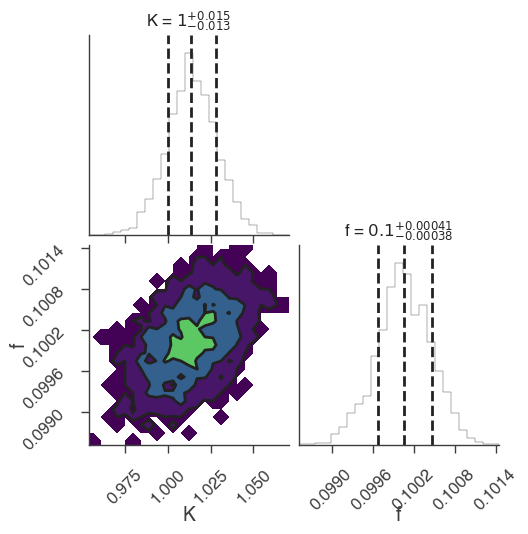

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

20:21:00 INFO      sampler set to dynesty_dynamic                                          ]8;id=433259;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=222244;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

52it [00:00, 518.63it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 58 | eff(%):  9.319 | loglstar:   -inf < -10424.114 <    inf | logz: -10431.125 +/-  0.118 | dlogz: 10455.404 >  0.010]

218it [00:00, 1181.78it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 285 | eff(%): 27.771 | loglstar:   -inf < -6524.522 <    inf | logz: -6531.866 +/-  0.121 | dlogz: 6531.359 >  0.010]

378it [00:00, 1367.57it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 561 | eff(%): 35.627 | loglstar:   -inf < -5150.875 <    inf | logz: -5158.538 +/-  0.124 | dlogz: 5154.454 >  0.010]

515it [00:00, 1300.09it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 853 | eff(%): 38.064 | loglstar:   -inf < -4295.542 <    inf | logz: -4302.490 +/-  0.117 | dlogz: 4289.503 >  0.010]

646it [00:00, 1157.79it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 1313 | eff(%): 35.632 | loglstar:   -inf < -3736.041 <    inf | logz: -3743.759 +/-  0.117 | dlogz: 3730.639 >  0.010]

765it [00:00, 1061.06it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 1749 | eff(%): 34.015 | loglstar:   -inf < -3368.511 <    inf | logz: -3375.714 +/-  0.117 | dlogz: 3361.717 >  0.010]

874it [00:00, 943.42it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 2246 | eff(%): 31.828 | loglstar:   -inf < -3103.489 <    inf | logz: -3112.054 +/-  0.128 | dlogz: 3100.044 >  0.010] 

972it [00:00, 839.38it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 2837 | eff(%): 29.128 | loglstar:   -inf < -2907.560 <    inf | logz: -2916.407 +/-  0.133 | dlogz: 2907.710 >  0.010]

1059it [00:01, 765.01it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 3425 | eff(%): 26.981 | loglstar:   -inf < -2607.379 <    inf | logz: -2616.387 +/-  0.133 | dlogz: 2605.599 >  0.010]

1138it [00:01, 683.69it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 4073 | eff(%): 24.885 | loglstar:   -inf < -2355.453 <    inf | logz: -2364.553 +/-  0.133 | dlogz: 2352.018 >  0.010]

1209it [00:01, 629.40it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 4649 | eff(%): 23.480 | loglstar:   -inf < -2221.067 <    inf | logz: -2229.093 +/-  0.124 | dlogz: 2216.448 >  0.010]

1274it [00:01, 567.72it/s, batch: 0 | bound: 0 | nc: 27 | ncall: 5295 | eff(%): 21.984 | loglstar:   -inf < -1963.055 <    inf | logz: -1972.508 +/-  0.137 | dlogz: 1969.298 >  0.010]

1332it [00:01, 458.51it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 6190 | eff(%): 19.910 | loglstar:   -inf < -1646.680 <    inf | logz: -1656.249 +/-  0.138 | dlogz: 1650.627 >  0.010] 

1381it [00:01, 436.95it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 6786 | eff(%): 18.954 | loglstar:   -inf < -1356.099 <    inf | logz: -1365.766 +/-  0.139 | dlogz: 1362.331 >  0.010]

1427it [00:02, 395.75it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 7435 | eff(%): 17.984 | loglstar:   -inf < -1194.147 <    inf | logz: -1203.762 +/-  0.135 | dlogz: 1192.206 >  0.010]

1468it [00:02, 386.80it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 7955 | eff(%): 17.363 | loglstar:   -inf < -1073.793 <    inf | logz: -1083.465 +/-  0.136 | dlogz: 1072.146 >  0.010]

1508it [00:02, 326.74it/s, batch: 0 | bound: 0 | nc: 15 | ncall: 8803 | eff(%): 16.210 | loglstar:   -inf < -976.632 <    inf | logz: -986.098 +/-  0.131 | dlogz: 973.388 >  0.010]  

1543it [00:02, 313.29it/s, batch: 0 | bound: 0 | nc: 38 | ncall: 9389 | eff(%): 15.603 | loglstar:   -inf < -901.357 <    inf | logz: -910.153 +/-  0.131 | dlogz: 897.061 >  0.010]

1576it [00:02, 306.41it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 9917 | eff(%): 15.129 | loglstar:   -inf < -827.251 <    inf | logz: -835.732 +/-  0.127 | dlogz: 822.184 >  0.010] 

1608it [00:02, 296.35it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 10450 | eff(%): 14.685 | loglstar:   -inf < -764.174 <    inf | logz: -773.963 +/-  0.135 | dlogz: 761.588 >  0.010]

1638it [00:02, 260.21it/s, batch: 0 | bound: 0 | nc: 52 | ncall: 11151 | eff(%): 14.059 | loglstar:   -inf < -725.604 <    inf | logz: -734.937 +/-  0.130 | dlogz: 721.569 >  0.010]

1665it [00:03, 238.70it/s, batch: 0 | bound: 0 | nc: 22 | ncall: 11807 | eff(%): 13.529 | loglstar:   -inf < -678.550 <    inf | logz: -687.997 +/-  0.132 | dlogz: 674.793 >  0.010]

1690it [00:03, 236.87it/s, batch: 0 | bound: 0 | nc: 37 | ncall: 12229 | eff(%): 13.277 | loglstar:   -inf < -651.207 <    inf | logz: -660.913 +/-  0.134 | dlogz: 647.931 >  0.010]

1714it [00:03, 217.03it/s, batch: 0 | bound: 0 | nc: 28 | ncall: 12912 | eff(%): 12.780 | loglstar:   -inf < -632.634 <    inf | logz: -641.777 +/-  0.129 | dlogz: 628.125 >  0.010]

1736it [00:03, 213.41it/s, batch: 0 | bound: 0 | nc: 15 | ncall: 13398 | eff(%): 12.491 | loglstar:   -inf < -607.206 <    inf | logz: -616.553 +/-  0.134 | dlogz: 603.178 >  0.010]

1758it [00:03, 203.28it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 13984 | eff(%): 12.138 | loglstar:   -inf < -581.239 <    inf | logz: -590.754 +/-  0.133 | dlogz: 577.216 >  0.010] 

1779it [00:03, 178.16it/s, batch: 0 | bound: 0 | nc: 36 | ncall: 14671 | eff(%): 11.726 | loglstar:   -inf < -558.159 <    inf | logz: -568.121 +/-  0.137 | dlogz: 555.225 >  0.010]

1798it [00:03, 170.15it/s, batch: 0 | bound: 0 | nc: 17 | ncall: 15218 | eff(%): 11.439 | loglstar:   -inf < -541.315 <    inf | logz: -550.798 +/-  0.131 | dlogz: 537.014 >  0.010]

1821it [00:03, 182.42it/s, batch: 0 | bound: 0 | nc: 60 | ncall: 15700 | eff(%): 11.241 | loglstar:   -inf < -520.254 <    inf | logz: -530.297 +/-  0.135 | dlogz: 516.942 >  0.010]

1840it [00:04, 156.45it/s, batch: 0 | bound: 0 | nc: 57 | ncall: 16521 | eff(%): 10.810 | loglstar:   -inf < -506.116 <    inf | logz: -515.006 +/-  0.126 | dlogz: 500.750 >  0.010]

1859it [00:04, 164.16it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 16968 | eff(%): 10.642 | loglstar:   -inf < -489.578 <    inf | logz: -499.746 +/-  0.136 | dlogz: 486.326 >  0.010] 

1877it [00:04, 162.02it/s, batch: 0 | bound: 0 | nc: 104 | ncall: 17470 | eff(%): 10.445 | loglstar:   -inf < -474.275 <    inf | logz: -483.922 +/-  0.135 | dlogz: 470.197 >  0.010]

1894it [00:04, 157.22it/s, batch: 0 | bound: 0 | nc: 28 | ncall: 17989 | eff(%): 10.244 | loglstar:   -inf < -463.573 <    inf | logz: -472.994 +/-  0.129 | dlogz: 458.774 >  0.010] 

1911it [00:04, 147.44it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 18605 | eff(%): 10.003 | loglstar:   -inf < -452.116 <    inf | logz: -462.247 +/-  0.135 | dlogz: 448.605 >  0.010]

1927it [00:04, 107.25it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 18664 | eff(%): 10.055 | loglstar:   -inf < -438.696 <    inf | logz: -448.188 +/-  0.134 | dlogz: 434.167 >  0.010] 

2081it [00:04, 402.28it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 18901 | eff(%): 10.726 | loglstar:   -inf < -332.584 <    inf | logz: -342.150 +/-  0.131 | dlogz: 327.492 >  0.010]

2203it [00:04, 587.43it/s, batch: 0 | bound: 1 | nc: 9 | ncall: 19141 | eff(%): 11.216 | loglstar:   -inf < -264.589 <    inf | logz: -274.794 +/-  0.136 | dlogz: 260.951 >  0.010]

2301it [00:05, 439.52it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 19399 | eff(%): 11.563 | loglstar:   -inf < -222.324 <    inf | logz: -232.080 +/-  0.133 | dlogz: 217.679 >  0.010]

2449it [00:05, 630.56it/s, batch: 0 | bound: 2 | nc: 3 | ncall: 19601 | eff(%): 12.183 | loglstar:   -inf < -170.014 <    inf | logz: -180.033 +/-  0.134 | dlogz: 165.909 >  0.010]

2586it [00:05, 784.02it/s, batch: 0 | bound: 2 | nc: 6 | ncall: 19846 | eff(%): 12.710 | loglstar:   -inf < -127.466 <    inf | logz: -137.532 +/-  0.135 | dlogz: 123.055 >  0.010]

2689it [00:05, 836.79it/s, batch: 0 | bound: 2 | nc: 4 | ncall: 20087 | eff(%): 13.062 | loglstar:   -inf < -108.063 <    inf | logz: -117.770 +/-  0.132 | dlogz: 102.938 >  0.010]

2791it [00:05, 581.10it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 20241 | eff(%): 13.456 | loglstar:   -inf < -89.607 <    inf | logz: -99.600 +/-  0.134 | dlogz: 84.727 >  0.010]   

2943it [00:06, 756.44it/s, batch: 0 | bound: 3 | nc: 4 | ncall: 20453 | eff(%): 14.046 | loglstar:   -inf < -71.523 <    inf | logz: -81.362 +/-  0.134 | dlogz: 66.133 >  0.010]

3082it [00:06, 889.63it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 20728 | eff(%): 14.519 | loglstar:   -inf < -55.098 <    inf | logz: -65.284 +/-  0.135 | dlogz: 49.786 >  0.010]

3196it [00:06, 632.71it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20948 | eff(%): 14.901 | loglstar:   -inf < -44.809 <    inf | logz: -54.872 +/-  0.134 | dlogz: 39.109 >  0.010]

3345it [00:06, 787.33it/s, batch: 0 | bound: 4 | nc: 4 | ncall: 21159 | eff(%): 15.444 | loglstar:   -inf < -36.335 <    inf | logz: -46.062 +/-  0.133 | dlogz: 29.964 >  0.010]

3479it [00:06, 900.66it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 21381 | eff(%): 15.900 | loglstar:   -inf < -29.963 <    inf | logz: -39.881 +/-  0.134 | dlogz: 23.512 >  0.010]

3600it [00:06, 626.84it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21653 | eff(%): 16.251 | loglstar:   -inf < -25.600 <    inf | logz: -35.699 +/-  0.134 | dlogz: 19.084 >  0.010]

3757it [00:07, 789.17it/s, batch: 0 | bound: 5 | nc: 3 | ncall: 21858 | eff(%): 16.804 | loglstar:   -inf < -20.810 <    inf | logz: -30.814 +/-  0.134 | dlogz: 13.873 >  0.010]

3888it [00:07, 891.19it/s, batch: 0 | bound: 5 | nc: 4 | ncall: 22090 | eff(%): 17.211 | loglstar:   -inf < -18.249 <    inf | logz: -28.088 +/-  0.134 | dlogz: 10.878 >  0.010]

4021it [00:07, 984.71it/s, batch: 0 | bound: 5 | nc: 4 | ncall: 22362 | eff(%): 17.588 | loglstar:   -inf < -16.305 <    inf | logz: -26.134 +/-  0.133 | dlogz:  8.654 >  0.010]

4142it [00:07, 676.51it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 22528 | eff(%): 17.987 | loglstar:   -inf < -14.650 <    inf | logz: -24.652 +/-  0.134 | dlogz:  6.930 >  0.010]

4276it [00:07, 796.00it/s, batch: 0 | bound: 6 | nc: 6 | ncall: 22735 | eff(%): 18.403 | loglstar:   -inf < -13.390 <    inf | logz: -23.322 +/-  0.134 | dlogz:  5.334 >  0.010]

4394it [00:07, 874.69it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 22961 | eff(%): 18.729 | loglstar:   -inf < -12.585 <    inf | logz: -22.493 +/-  0.134 | dlogz:  4.277 >  0.010]

4505it [00:08, 605.50it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 23191 | eff(%): 19.016 | loglstar:   -inf < -11.906 <    inf | logz: -21.849 +/-  0.134 | dlogz:  3.428 >  0.010]

4661it [00:08, 772.05it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 23411 | eff(%): 19.493 | loglstar:   -inf < -11.214 <    inf | logz: -21.163 +/-  0.134 | dlogz:  2.483 >  0.010]

4775it [00:08, 844.49it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 23602 | eff(%): 19.812 | loglstar:   -inf < -10.870 <    inf | logz: -20.782 +/-  0.134 | dlogz:  1.942 >  0.010]

4890it [00:08, 911.76it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 23857 | eff(%): 20.076 | loglstar:   -inf < -10.570 <    inf | logz: -20.481 +/-  0.134 | dlogz:  1.506 >  0.010]

5001it [00:08, 640.17it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 24026 | eff(%): 20.391 | loglstar:   -inf < -10.357 <    inf | logz: -20.254 +/-  0.134 | dlogz:  1.177 >  0.010]

5151it [00:08, 800.11it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 24239 | eff(%): 20.821 | loglstar:   -inf < -10.134 <    inf | logz: -20.021 +/-  0.134 | dlogz:  0.841 >  0.010]

5284it [00:08, 910.89it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 24486 | eff(%): 21.148 | loglstar:   -inf < -9.954 <    inf | logz: -19.863 +/-  0.133 | dlogz:  0.622 >  0.010] 

5399it [00:09, 628.75it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 24722 | eff(%): 21.406 | loglstar:   -inf < -9.842 <    inf | logz: -19.755 +/-  0.133 | dlogz:  0.480 >  0.010]

5531it [00:09, 750.31it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 24903 | eff(%): 21.773 | loglstar:   -inf < -9.745 <    inf | logz: -19.658 +/-  0.133 | dlogz:  0.357 >  0.010]

5663it [00:09, 864.63it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 25146 | eff(%): 22.081 | loglstar:   -inf < -9.676 <    inf | logz: -19.584 +/-  0.133 | dlogz:  0.267 >  0.010]

5775it [00:09, 903.16it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 25407 | eff(%): 22.291 | loglstar:   -inf < -9.632 <    inf | logz: -19.535 +/-  0.133 | dlogz:  0.209 >  0.010]

5884it [00:09, 625.62it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 25536 | eff(%): 22.599 | loglstar:   -inf < -9.597 <    inf | logz: -19.497 +/-  0.133 | dlogz:  0.166 >  0.010]

6017it [00:10, 753.95it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 25727 | eff(%): 22.942 | loglstar:   -inf < -9.563 <    inf | logz: -19.460 +/-  0.133 | dlogz:  0.125 >  0.010]

6126it [00:10, 823.60it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 25937 | eff(%): 23.172 | loglstar:   -inf < -9.543 <    inf | logz: -19.437 +/-  0.133 | dlogz:  0.100 >  0.010]

6229it [00:10, 547.99it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 26181 | eff(%): 23.346 | loglstar:   -inf < -9.527 <    inf | logz: -19.419 +/-  0.133 | dlogz:  0.080 >  0.010]

6386it [00:10, 720.89it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 26375 | eff(%): 23.762 | loglstar:   -inf < -9.508 <    inf | logz: -19.398 +/-  0.133 | dlogz:  0.058 >  0.010]

6500it [00:10, 802.53it/s, batch: 0 | bound: 11 | nc: 5 | ncall: 26558 | eff(%): 24.022 | loglstar:   -inf < -9.497 <    inf | logz: -19.387 +/-  0.133 | dlogz:  0.046 >  0.010]

6632it [00:10, 914.13it/s, batch: 0 | bound: 11 | nc: 4 | ncall: 26814 | eff(%): 24.281 | loglstar:   -inf < -9.488 <    inf | logz: -19.376 +/-  0.133 | dlogz:  0.035 >  0.010]

6746it [00:11, 613.19it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26995 | eff(%): 24.535 | loglstar:   -inf < -9.482 <    inf | logz: -19.369 +/-  0.133 | dlogz:  0.028 >  0.010]

6891it [00:11, 761.21it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 27197 | eff(%): 24.880 | loglstar:   -inf < -9.474 <    inf | logz: -19.362 +/-  0.133 | dlogz:  0.021 >  0.010]

7005it [00:11, 837.47it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 27407 | eff(%): 25.101 | loglstar:   -inf < -9.471 <    inf | logz: -19.358 +/-  0.133 | dlogz:  0.017 >  0.010]

7114it [00:11, 574.45it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 27688 | eff(%): 25.238 | loglstar:   -inf < -9.468 <    inf | logz: -19.355 +/-  0.133 | dlogz:  0.013 >  0.010]

7251it [00:11, 709.59it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 27861 | eff(%): 25.567 | loglstar:   -inf < -9.465 <    inf | logz: -19.352 +/-  0.133 | dlogz:  0.010 >  0.010]

7652it [00:11, 1354.84it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 28266 | eff(%): 26.972 | loglstar:   -inf < -9.457 <    inf | logz: -19.344 +/-  0.133 | dlogz:  0.002 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7843it [00:13, 440.56it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 28474 | eff(%): 27.037 | loglstar: -11.329 < -11.017 < -9.902 | logz: -19.342 +/-  0.137 | stop:  1.358]          

8002it [00:13, 538.29it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 28711 | eff(%): 27.362 | loglstar: -11.329 < -10.554 < -9.902 | logz: -19.342 +/-  0.137 | stop:  1.358]

8147it [00:13, 623.22it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 29038 | eff(%): 27.550 | loglstar: -11.329 < -10.293 < -9.902 | logz: -19.342 +/-  0.137 | stop:  1.358]

8285it [00:13, 549.71it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 29246 | eff(%): 27.821 | loglstar: -11.329 < -10.091 < -9.902 | logz: -19.342 +/-  0.137 | stop:  1.358]

8416it [00:13, 644.60it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 29437 | eff(%): 28.080 | loglstar: -11.329 < -9.956 < -9.902 | logz: -19.342 +/-  0.137 | stop:  1.358] 

8718it [00:13, 1004.44it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 29796 | eff(%): 28.994 | loglstar: -11.329 < -9.671 < -9.902 | logz: -19.342 +/-  0.137 | stop:  1.358]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8972it [00:15, 383.93it/s, batch: 2 | bound: 0 | nc: 1 | ncall: 30068 | eff(%): 29.839 | loglstar: -11.783 < -10.474 < -11.325 | logz: -19.338 +/-  0.111 | stop:  1.169]

9146it [00:15, 480.10it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 30279 | eff(%): 29.705 | loglstar: -11.783 < -11.109 < -11.325 | logz: -19.338 +/-  0.111 | stop:  1.169]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9589it [00:16, 372.28it/s, batch: 3 | bound: 0 | nc: 1 | ncall: 30789 | eff(%): 31.144 | loglstar: -12.214 < -9.990 < -11.777 | logz: -19.354 +/-  0.104 | stop:  1.070] 

9785it [00:16, 459.34it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 30998 | eff(%): 31.169 | loglstar: -12.214 < -11.239 < -11.777 | logz: -19.354 +/-  0.104 | stop:  1.070]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



10174it [00:17, 457.09it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 31393 | eff(%): 32.408 | loglstar: -12.214 < -9.459 < -11.777 | logz: -19.354 +/-  0.104 | stop:  0.931]

10174it [00:17, 573.45it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 31393 | eff(%): 32.408 | loglstar: -12.214 < -9.459 < -11.777 | logz: -19.354 +/-  0.104 | stop:  0.931]

20:21:19 INFO      fit restored to maximum of posterior                                         ]8;id=685677;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=795396;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=309641;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=294351;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.014 -0.015 +0.014,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.001 +/- 0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.46888
total,-9.46888


Values of statistical measures:

,statistical measures
AIC,23.643643
BIC,24.929225
DIC,22.869706
PDIC,1.965866
log(Z),-8.403972


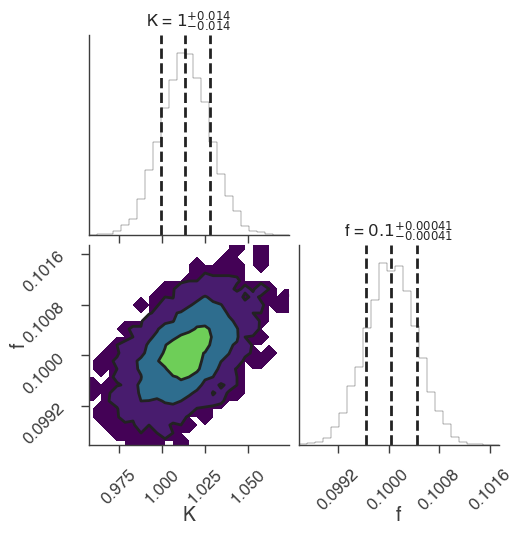

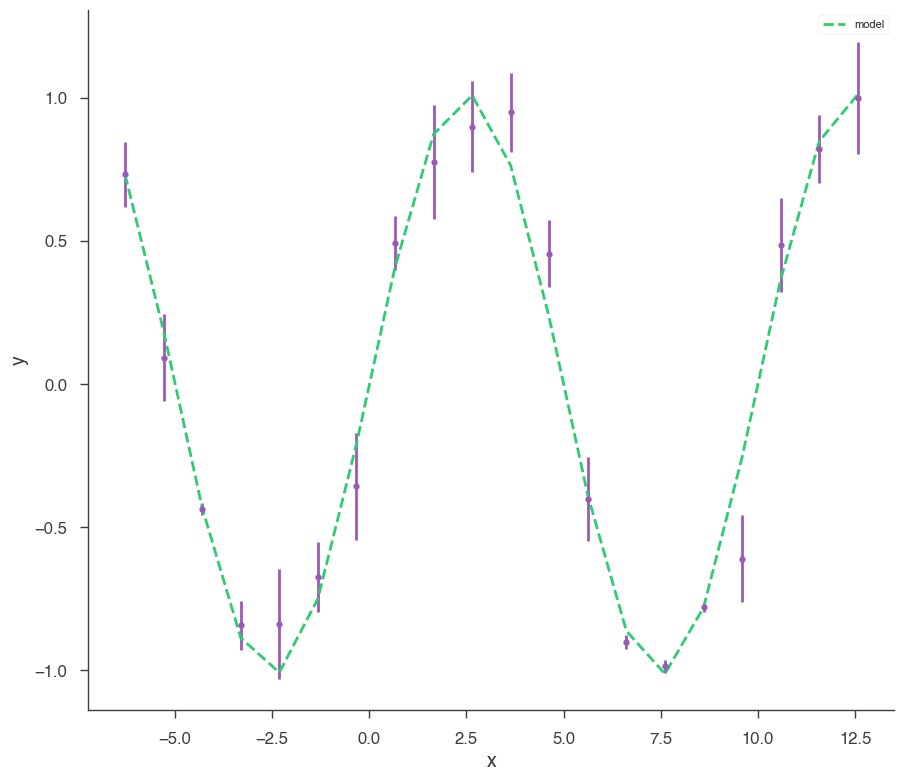

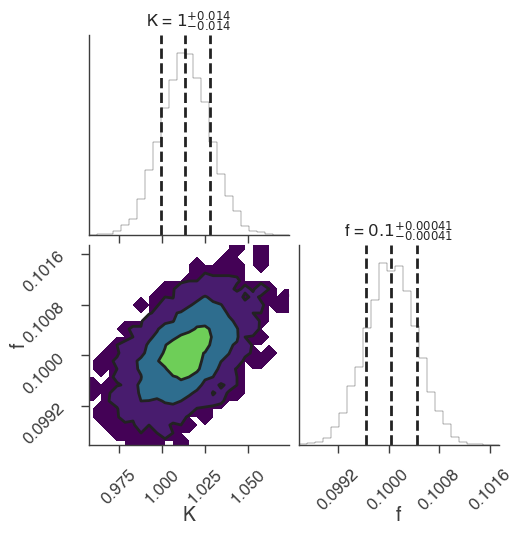

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

20:21:20 INFO      sampler set to zeus                                                     ]8;id=654860;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=869331;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   0%|          | 3/625 [00:00<00:21, 29.58it/s]

Sampling progress :   1%|          | 6/625 [00:00<00:21, 28.45it/s]

Sampling progress :   2%|▏         | 10/625 [00:00<00:20, 29.53it/s]

Sampling progress :   2%|▏         | 13/625 [00:00<00:20, 29.63it/s]

Sampling progress :   3%|▎         | 17/625 [00:00<00:18, 32.17it/s]

Sampling progress :   3%|▎         | 21/625 [00:00<00:18, 32.95it/s]

Sampling progress :   4%|▍         | 25/625 [00:00<00:17, 33.53it/s]

Sampling progress :   5%|▍         | 29/625 [00:00<00:17, 34.32it/s]

Sampling progress :   5%|▌         | 33/625 [00:01<00:17, 34.22it/s]

Sampling progress :   6%|▌         | 37/625 [00:01<00:17, 34.30it/s]

Sampling progress :   7%|▋         | 41/625 [00:01<00:17, 33.85it/s]

Sampling progress :   7%|▋         | 45/625 [00:01<00:16, 34.47it/s]

Sampling progress :   8%|▊         | 49/625 [00:01<00:17, 33.66it/s]

Sampling progress :   8%|▊         | 53/625 [00:01<00:17, 33.54it/s]

Sampling progress :   9%|▉         | 57/625 [00:01<00:16, 34.52it/s]

Sampling progress :  10%|▉         | 61/625 [00:01<00:17, 32.72it/s]

Sampling progress :  10%|█         | 65/625 [00:01<00:16, 34.17it/s]

Sampling progress :  11%|█         | 69/625 [00:02<00:16, 33.31it/s]

Sampling progress :  12%|█▏        | 73/625 [00:02<00:16, 33.65it/s]

Sampling progress :  12%|█▏        | 77/625 [00:02<00:16, 33.90it/s]

Sampling progress :  13%|█▎        | 81/625 [00:02<00:15, 34.32it/s]

Sampling progress :  14%|█▎        | 85/625 [00:02<00:15, 34.03it/s]

Sampling progress :  14%|█▍        | 89/625 [00:02<00:15, 35.20it/s]

Sampling progress :  15%|█▍        | 93/625 [00:02<00:15, 33.36it/s]

Sampling progress :  16%|█▌        | 97/625 [00:02<00:15, 33.34it/s]

Sampling progress :  16%|█▌        | 101/625 [00:03<00:16, 32.66it/s]

Sampling progress :  17%|█▋        | 105/625 [00:03<00:16, 31.76it/s]

Sampling progress :  17%|█▋        | 109/625 [00:03<00:15, 33.53it/s]

Sampling progress :  18%|█▊        | 113/625 [00:03<00:14, 34.18it/s]

Sampling progress :  19%|█▊        | 117/625 [00:03<00:14, 34.93it/s]

Sampling progress :  19%|█▉        | 121/625 [00:03<00:14, 34.32it/s]

Sampling progress :  20%|██        | 126/625 [00:03<00:13, 35.71it/s]

Sampling progress :  21%|██        | 130/625 [00:03<00:14, 34.89it/s]

Sampling progress :  21%|██▏       | 134/625 [00:03<00:14, 33.97it/s]

Sampling progress :  22%|██▏       | 138/625 [00:04<00:14, 33.57it/s]

Sampling progress :  23%|██▎       | 142/625 [00:04<00:14, 33.95it/s]

Sampling progress :  23%|██▎       | 146/625 [00:04<00:14, 33.72it/s]

Sampling progress :  24%|██▍       | 150/625 [00:04<00:14, 33.87it/s]

Sampling progress :  25%|██▍       | 154/625 [00:04<00:13, 34.55it/s]

Sampling progress :  25%|██▌       | 158/625 [00:04<00:13, 34.10it/s]

Sampling progress :  26%|██▌       | 162/625 [00:04<00:13, 34.24it/s]

Sampling progress :  27%|██▋       | 166/625 [00:04<00:13, 33.52it/s]

Sampling progress :  27%|██▋       | 170/625 [00:05<00:13, 34.16it/s]

Sampling progress :  28%|██▊       | 174/625 [00:05<00:13, 33.47it/s]

Sampling progress :  28%|██▊       | 178/625 [00:05<00:14, 31.29it/s]

Sampling progress :  29%|██▉       | 182/625 [00:05<00:13, 32.23it/s]

Sampling progress :  30%|██▉       | 186/625 [00:05<00:12, 34.01it/s]

Sampling progress :  30%|███       | 190/625 [00:05<00:12, 35.07it/s]

Sampling progress :  31%|███       | 194/625 [00:05<00:12, 35.40it/s]

Sampling progress :  32%|███▏      | 198/625 [00:05<00:12, 35.56it/s]

Sampling progress :  32%|███▏      | 202/625 [00:06<00:12, 33.07it/s]

Sampling progress :  33%|███▎      | 206/625 [00:06<00:12, 33.77it/s]

Sampling progress :  34%|███▎      | 210/625 [00:06<00:12, 33.23it/s]

Sampling progress :  34%|███▍      | 214/625 [00:06<00:12, 33.95it/s]

Sampling progress :  35%|███▍      | 218/625 [00:06<00:11, 34.16it/s]

Sampling progress :  36%|███▌      | 222/625 [00:06<00:11, 33.58it/s]

Sampling progress :  36%|███▌      | 226/625 [00:06<00:12, 32.15it/s]

Sampling progress :  37%|███▋      | 230/625 [00:06<00:12, 31.88it/s]

Sampling progress :  37%|███▋      | 234/625 [00:06<00:12, 32.15it/s]

Sampling progress :  38%|███▊      | 238/625 [00:07<00:11, 32.34it/s]

Sampling progress :  39%|███▊      | 242/625 [00:07<00:11, 33.56it/s]

Sampling progress :  39%|███▉      | 246/625 [00:07<00:11, 33.65it/s]

Sampling progress :  40%|████      | 250/625 [00:07<00:11, 33.92it/s]

Sampling progress :  41%|████      | 254/625 [00:07<00:10, 34.99it/s]

Sampling progress :  41%|████▏     | 258/625 [00:07<00:10, 33.61it/s]

Sampling progress :  42%|████▏     | 262/625 [00:07<00:10, 33.01it/s]

Sampling progress :  43%|████▎     | 266/625 [00:07<00:10, 34.08it/s]

Sampling progress :  43%|████▎     | 270/625 [00:08<00:10, 33.80it/s]

Sampling progress :  44%|████▍     | 274/625 [00:08<00:10, 34.40it/s]

Sampling progress :  44%|████▍     | 278/625 [00:08<00:10, 34.20it/s]

Sampling progress :  45%|████▌     | 282/625 [00:08<00:10, 33.59it/s]

Sampling progress :  46%|████▌     | 286/625 [00:08<00:10, 32.36it/s]

Sampling progress :  46%|████▋     | 290/625 [00:08<00:10, 32.35it/s]

Sampling progress :  47%|████▋     | 294/625 [00:08<00:10, 31.95it/s]

Sampling progress :  48%|████▊     | 298/625 [00:08<00:09, 32.95it/s]

Sampling progress :  48%|████▊     | 302/625 [00:09<00:09, 33.40it/s]

Sampling progress :  49%|████▉     | 306/625 [00:09<00:09, 34.29it/s]

Sampling progress :  50%|████▉     | 310/625 [00:09<00:09, 34.28it/s]

Sampling progress :  50%|█████     | 314/625 [00:09<00:08, 34.81it/s]

Sampling progress :  51%|█████     | 318/625 [00:09<00:09, 33.80it/s]

Sampling progress :  52%|█████▏    | 322/625 [00:09<00:08, 34.95it/s]

Sampling progress :  52%|█████▏    | 326/625 [00:09<00:08, 34.81it/s]

Sampling progress :  53%|█████▎    | 330/625 [00:09<00:08, 34.38it/s]

Sampling progress :  53%|█████▎    | 334/625 [00:09<00:08, 33.58it/s]

Sampling progress :  54%|█████▍    | 338/625 [00:10<00:08, 34.63it/s]

Sampling progress :  55%|█████▍    | 342/625 [00:10<00:08, 33.74it/s]

Sampling progress :  55%|█████▌    | 346/625 [00:10<00:08, 33.60it/s]

Sampling progress :  56%|█████▌    | 350/625 [00:10<00:08, 33.13it/s]

Sampling progress :  57%|█████▋    | 354/625 [00:10<00:08, 32.70it/s]

Sampling progress :  57%|█████▋    | 358/625 [00:10<00:08, 33.05it/s]

Sampling progress :  58%|█████▊    | 362/625 [00:10<00:08, 32.87it/s]

Sampling progress :  59%|█████▊    | 366/625 [00:10<00:08, 31.33it/s]

Sampling progress :  59%|█████▉    | 370/625 [00:11<00:07, 32.60it/s]

Sampling progress :  60%|█████▉    | 374/625 [00:11<00:07, 33.32it/s]

Sampling progress :  60%|██████    | 378/625 [00:11<00:07, 32.73it/s]

Sampling progress :  61%|██████    | 382/625 [00:11<00:07, 33.29it/s]

Sampling progress :  62%|██████▏   | 386/625 [00:11<00:06, 34.44it/s]

Sampling progress :  62%|██████▏   | 390/625 [00:11<00:06, 33.75it/s]

Sampling progress :  63%|██████▎   | 394/625 [00:11<00:06, 33.47it/s]

Sampling progress :  64%|██████▎   | 398/625 [00:11<00:06, 34.39it/s]

Sampling progress :  64%|██████▍   | 402/625 [00:11<00:06, 34.61it/s]

Sampling progress :  65%|██████▍   | 406/625 [00:12<00:06, 33.79it/s]

Sampling progress :  66%|██████▌   | 410/625 [00:12<00:06, 32.48it/s]

Sampling progress :  66%|██████▌   | 414/625 [00:12<00:06, 33.02it/s]

Sampling progress :  67%|██████▋   | 418/625 [00:12<00:06, 33.49it/s]

Sampling progress :  68%|██████▊   | 422/625 [00:12<00:06, 33.12it/s]

Sampling progress :  68%|██████▊   | 426/625 [00:12<00:05, 33.81it/s]

Sampling progress :  69%|██████▉   | 430/625 [00:12<00:05, 34.31it/s]

Sampling progress :  69%|██████▉   | 434/625 [00:12<00:05, 34.92it/s]

Sampling progress :  70%|███████   | 438/625 [00:13<00:05, 35.36it/s]

Sampling progress :  71%|███████   | 442/625 [00:13<00:05, 34.17it/s]

Sampling progress :  71%|███████▏  | 446/625 [00:13<00:05, 34.02it/s]

Sampling progress :  72%|███████▏  | 450/625 [00:13<00:05, 33.57it/s]

Sampling progress :  73%|███████▎  | 454/625 [00:13<00:05, 33.89it/s]

Sampling progress :  73%|███████▎  | 458/625 [00:13<00:05, 32.43it/s]

Sampling progress :  74%|███████▍  | 462/625 [00:13<00:05, 32.41it/s]

Sampling progress :  75%|███████▍  | 466/625 [00:13<00:04, 32.26it/s]

Sampling progress :  75%|███████▌  | 470/625 [00:14<00:04, 32.27it/s]

Sampling progress :  76%|███████▌  | 474/625 [00:14<00:04, 33.05it/s]

Sampling progress :  76%|███████▋  | 478/625 [00:14<00:04, 32.42it/s]

Sampling progress :  77%|███████▋  | 482/625 [00:14<00:04, 31.87it/s]

Sampling progress :  78%|███████▊  | 486/625 [00:14<00:04, 31.94it/s]

Sampling progress :  78%|███████▊  | 490/625 [00:14<00:04, 33.23it/s]

Sampling progress :  79%|███████▉  | 494/625 [00:14<00:03, 33.32it/s]

Sampling progress :  80%|███████▉  | 498/625 [00:14<00:03, 33.70it/s]

Sampling progress :  80%|████████  | 502/625 [00:14<00:03, 32.52it/s]

Sampling progress :  81%|████████  | 506/625 [00:15<00:03, 32.94it/s]

Sampling progress :  82%|████████▏ | 510/625 [00:15<00:03, 32.69it/s]

Sampling progress :  82%|████████▏ | 514/625 [00:15<00:03, 31.61it/s]

Sampling progress :  83%|████████▎ | 518/625 [00:15<00:03, 31.54it/s]

Sampling progress :  84%|████████▎ | 522/625 [00:15<00:03, 32.59it/s]

Sampling progress :  84%|████████▍ | 526/625 [00:15<00:03, 32.43it/s]

Sampling progress :  85%|████████▍ | 530/625 [00:15<00:02, 33.87it/s]

Sampling progress :  85%|████████▌ | 534/625 [00:15<00:02, 32.43it/s]

Sampling progress :  86%|████████▌ | 538/625 [00:16<00:02, 32.99it/s]

Sampling progress :  87%|████████▋ | 542/625 [00:16<00:02, 32.88it/s]

Sampling progress :  87%|████████▋ | 546/625 [00:16<00:02, 32.87it/s]

Sampling progress :  88%|████████▊ | 550/625 [00:16<00:02, 33.08it/s]

Sampling progress :  89%|████████▊ | 554/625 [00:16<00:02, 33.45it/s]

Sampling progress :  89%|████████▉ | 558/625 [00:16<00:01, 33.52it/s]

Sampling progress :  90%|████████▉ | 562/625 [00:16<00:01, 33.30it/s]

Sampling progress :  91%|█████████ | 566/625 [00:16<00:01, 32.62it/s]

Sampling progress :  91%|█████████ | 570/625 [00:17<00:01, 33.19it/s]

Sampling progress :  92%|█████████▏| 574/625 [00:17<00:01, 32.41it/s]

Sampling progress :  92%|█████████▏| 578/625 [00:17<00:01, 32.72it/s]

Sampling progress :  93%|█████████▎| 582/625 [00:17<00:01, 33.02it/s]

Sampling progress :  94%|█████████▍| 586/625 [00:17<00:01, 32.26it/s]

Sampling progress :  94%|█████████▍| 590/625 [00:17<00:01, 31.95it/s]

Sampling progress :  95%|█████████▌| 594/625 [00:17<00:00, 32.35it/s]

Sampling progress :  96%|█████████▌| 598/625 [00:17<00:00, 33.54it/s]

Sampling progress :  96%|█████████▋| 602/625 [00:18<00:00, 33.10it/s]

Sampling progress :  97%|█████████▋| 606/625 [00:18<00:00, 33.06it/s]

Sampling progress :  98%|█████████▊| 610/625 [00:18<00:00, 32.14it/s]

Sampling progress :  98%|█████████▊| 614/625 [00:18<00:00, 33.18it/s]

Sampling progress :  99%|█████████▉| 618/625 [00:18<00:00, 33.44it/s]

Sampling progress : 100%|█████████▉| 622/625 [00:18<00:00, 34.45it/s]

Sampling progress : 100%|██████████| 625/625 [00:18<00:00, 33.41it/s]

20:21:40 INFO      fit restored to maximum of posterior                                         ]8;id=851897;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=163098;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=547998;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=9563;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 24


Scale Factor: 1.080911


Mean Integrated Autocorrelation Time: 2.8


Effective Sample Size: 4470.51


Number of Log Probability Evaluations: 66260


Effective Samples per Log Probability Evaluation: 0.067469


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.014 -0.015 +0.014,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.000 +/- 0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.468837
total,-9.468837


Values of statistical measures:

,statistical measures
AIC,23.643557
BIC,24.929139
DIC,22.957965
PDIC,2.009770


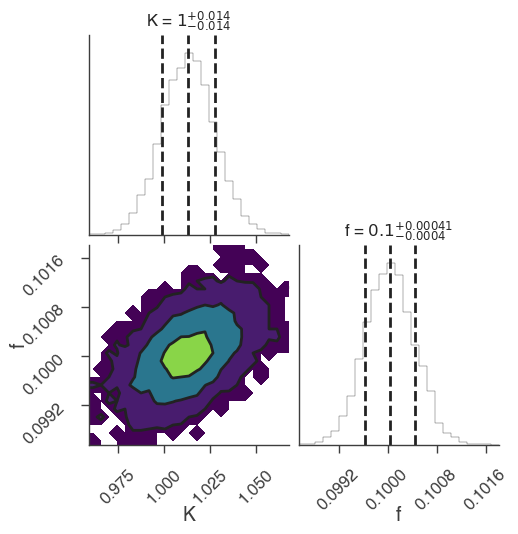

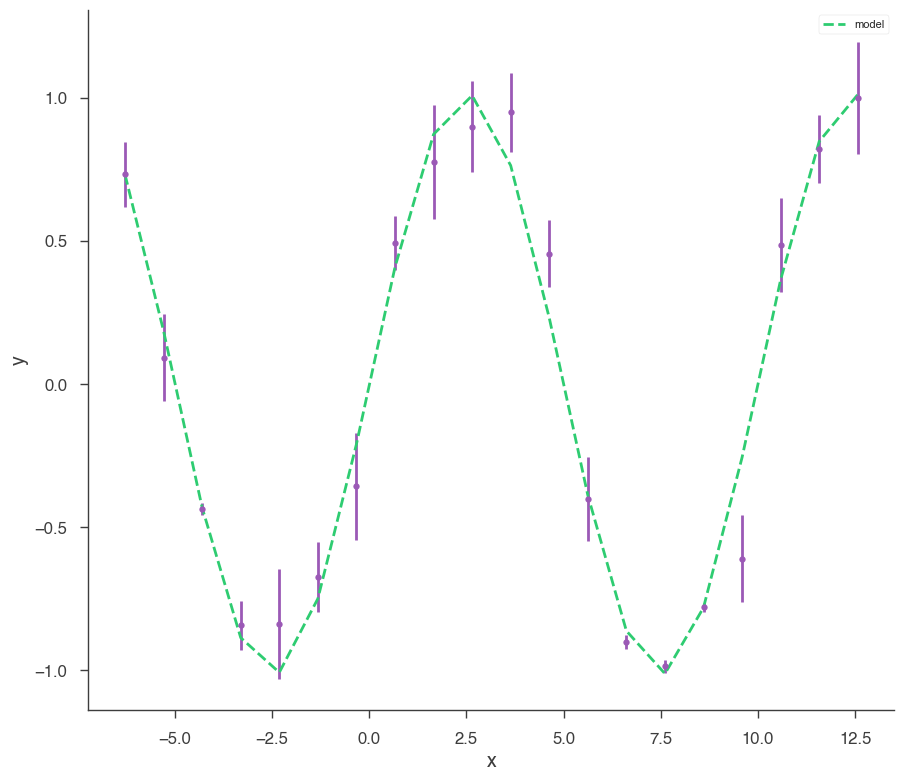

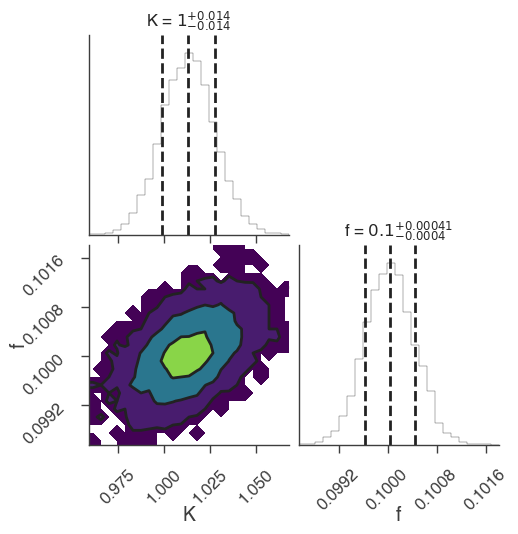

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

20:21:41 INFO      sampler set to ultranest                                                ]8;id=24268;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=133072;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-9  


[ultranest] Likelihood function evaluations: 7680


[ultranest]   logZ = -19.21 +- 0.1063


[ultranest] Effective samples strategy satisfied (ESS = 985.0, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.15 bs:0.11 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


20:21:53 INFO      fit restored to maximum of posterior                                         ]8;id=374098;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=411868;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=291072;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=982349;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.013 -0.014 +0.015,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.000 +/- 0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.470062
total,-9.470062


Values of statistical measures:

,statistical measures
AIC,23.646007
BIC,24.931589
DIC,23.057070
PDIC,2.059300
log(Z),-8.337248


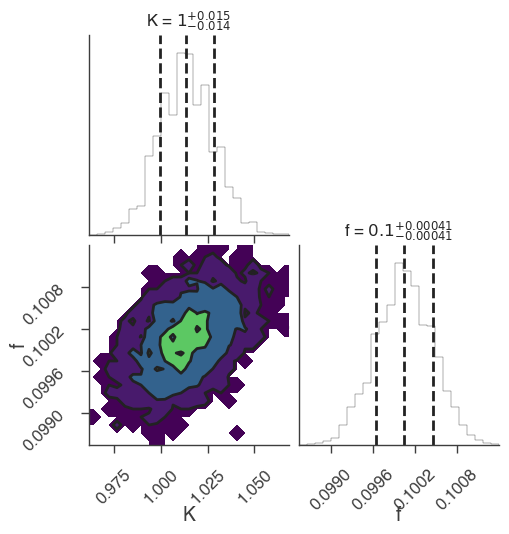

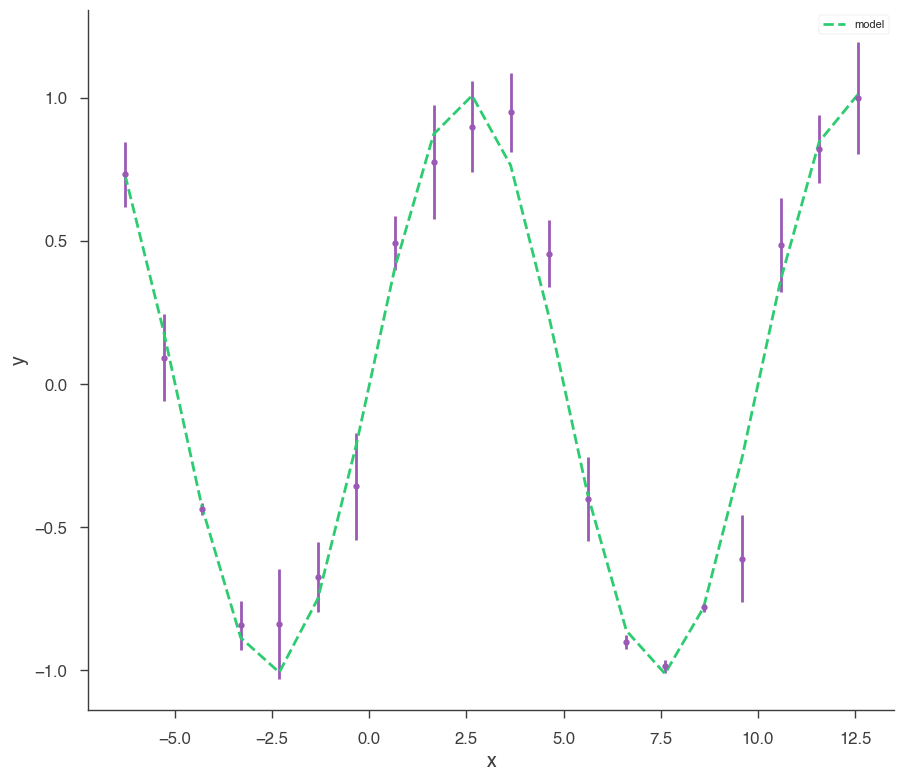

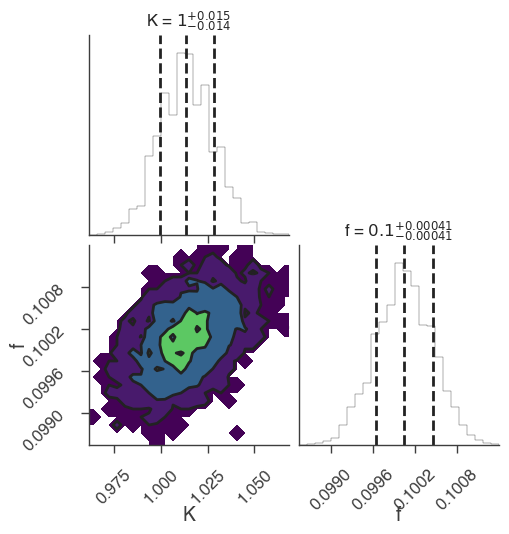

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()